# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [6]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

from timeit import timeit
def res_norm(A, x, b):
    return np.linalg.norm(b - A @ x)

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [3]:
m = 10
# a)
A1, b1 = main.random_matrix_Ab(m)
# b)
A2, b2 = main.diag_dominant_matrix_A_b(m)
# c)
A3, b3 = main.symmetric_matrix_A_b(m)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [7]:
# Solve
results_solve_1 = np_linalg.solve(A1, b1)
print("Norma:", res_norm(A1, results_solve_1, b1))
print("Czas", timeit(lambda:np_linalg.solve(A1, b1),number = 1000)/1000)


Norma: 7.652779469160725e-14
Czas 8.509199999934936e-06


In [9]:
# Jacobi
if main.is_diag_dominant(A1):
    x_init = np.zeros((m, 1))
    results_jacobi_1 = main.solve_jacobi(A1, b1, x_init)
    print("Norma:", res_norm(A1, results_jacobi_1, b1))
    print("Czas", timeit(main.solve_jacobi(A1, b1, x_init),number = 1000)/1000)
else:
    print('Macierz nie spelnia warunkow')

Macierz nie spelnia warunkow


In [10]:
# Gradienty
if main.is_symmetric(A1) and np.all(np.linalg.eigvals(A1) > 0):
    pass # tego nie trzeba pisac bo macierz nie jest symetryczna
else:
    print('Macierz nie spelnia warunkow')

Macierz nie spelnia warunkow


0


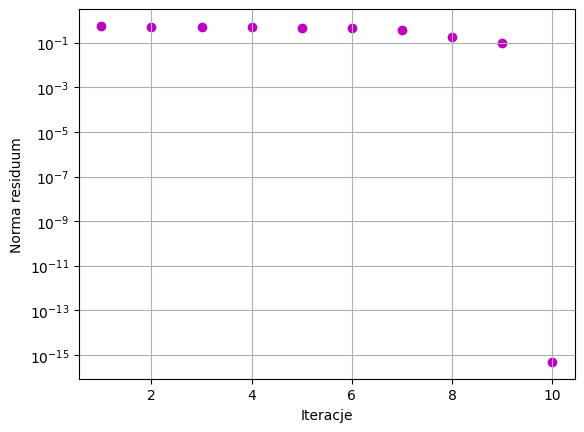

In [56]:
# GMRES
error = []
def callback_1(Xk):
    error.append(Xk)

results_GMRES_1, info = sp.sparse.linalg.gmres(A1, b1, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')

print(info)
lght = len(error)
x_r = [i + 1 for i in range(lght)]
plt.scatter(x_r, error, color = 'm')
plt.yscale('log')
plt.xlabel("Iteracje")
plt.ylabel("Norma residuum")
plt.grid()
plt.show()

457 µs ± 97.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
354 µs ± 77.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
404 µs ± 105 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
431 µs ± 103 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
394 µs ± 72.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
385 µs ± 49.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
389 µs ± 21 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
438 µs ± 46.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
409 µs ± 40.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
488 µs ± 152 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
371 µs ± 78 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
332 µs ± 32.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
311 µs ± 42.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
292 µs ± 19 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


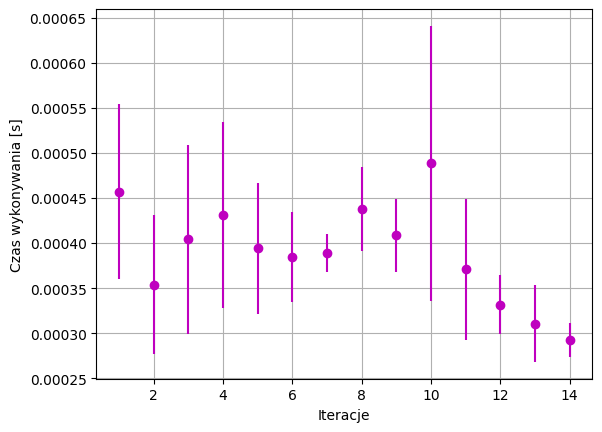

In [57]:
time = []
error = []
size = 15
for i in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A1, b1, maxiter = i, atol = 2.2e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [i for i in range(1, size)]
plt.errorbar(x, time, yerr = error, linestyle = "None", marker = "o", color = 'm')
plt.xlabel("Iteracje")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()

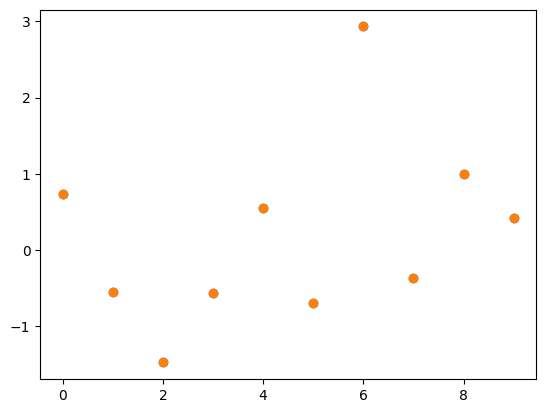

In [58]:
plt.scatter(range(m), results_solve_1)
#plt.scatter(range(m), results_jacobi_1)
#plt.scatter(range(m), results_gradients_2)
plt.scatter(range(m), results_GMRES_1)

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [15]:
# Solve
results_solve_2 = np_linalg.solve(A2, b2)
print("Norma:", res_norm(A2, results_solve_2, b2))
print("Czas", timeit(lambda:np_linalg.solve(A2, b2),number = 1000)/1000)

Norma: 1.7199501139797033e-15
Czas 8.003699999790115e-06


In [50]:
# Jacobi
if main.is_diag_dominant(A2):
    x_init = np.zeros(m)
    results_jacobi_2, i = main.solve_jacobi(A2, b2, x_init)
    print("Norma:", res_norm(A2, results_jacobi_2, b2))
    print("Czas", timeit(lambda:np_linalg.solve(A2,b2),number = 1000)/1000)
else:
    print('Macierz nie spelnia warunkow')

Norma: 0.0013424163969344184
Czas 9.503699999640958e-06


In [20]:
# Gradienty
if main.is_symmetric(A1) and np.all(np.linalg.eigvals(A1) > 0):
    pass # tego nie trzeba pisac bo macierz nie jest symetryczna
else:
    print('Macierz nie spelnia warunkow')

Macierz nie spelnia warunkow


0


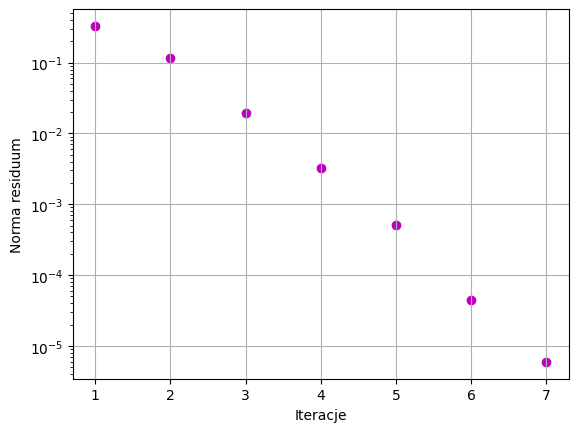

In [52]:
# GMRES
error = []
def callback_1(Xk):
    error.append(Xk)

results_GMRES_2, info = sp.sparse.linalg.gmres(A2, b2, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')

print(info)
lght = len(error)
x_r = [i + 1 for i in range(lght)]
plt.scatter(x_r, error, color = 'm')
plt.yscale('log')
plt.xlabel("Iteracje")
plt.ylabel("Norma residuum")
plt.grid()
plt.show()

274 µs ± 50.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
309 µs ± 45.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
302 µs ± 41.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
262 µs ± 28.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
314 µs ± 112 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
222 µs ± 15 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
239 µs ± 44.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
288 µs ± 19.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
217 µs ± 18.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
252 µs ± 50.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
251 µs ± 26 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
214 µs ± 5.99 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
220 µs ± 7.36 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
225 µs ± 14.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


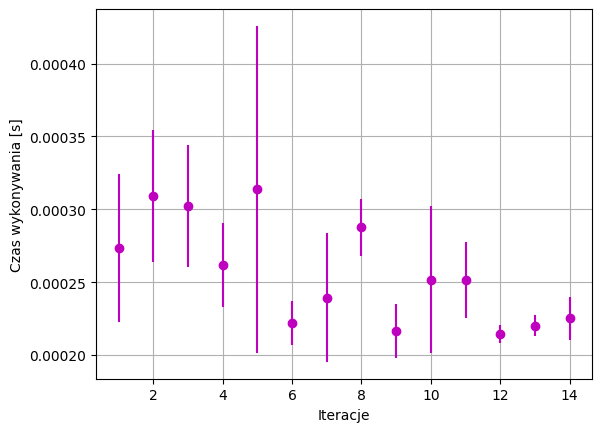

In [24]:
time = []
error = []
size = 15
for i in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter = i, atol = 2.2e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [i for i in range(1, size)]
plt.errorbar(x, time, yerr = error, linestyle = "None", marker = "o", color = 'm')
plt.xlabel("Iteracje")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()

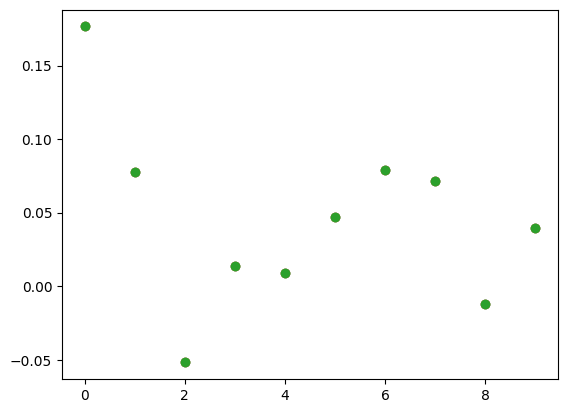

In [53]:
plt.scatter(range(m), results_solve_2)
plt.scatter(range(m), results_jacobi_2)
#plt.scatter(range(m), results_gradients_2)
plt.scatter(range(m), results_GMRES_2)

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [38]:
# Solve
results_solve_3 = np_linalg.solve(A3, b3)
print("Norma:", res_norm(A2, results_solve_3, b3))
print("Czas", timeit(lambda:np_linalg.solve(A3, b3),number = 1000)/1000)

Norma: 27.435563876887947
Czas 1.4312799999970594e-05


In [39]:
# Jacobi
if main.is_diag_dominant(A3):
    x_init = np.zeros((m, 1))
    results_jacobi_3, i = main.solve_jacobi(A3, b3, x_init)
    print("Norma:", res_norm(A3, results_jacobi_3, b3))
    print("Czas", timeit(lambda:np_linalg.solve(A3,b3),number = 1000)/1000)
else:
    print('Macierz nie spelnia warunkow')

Macierz nie spelnia warunkow


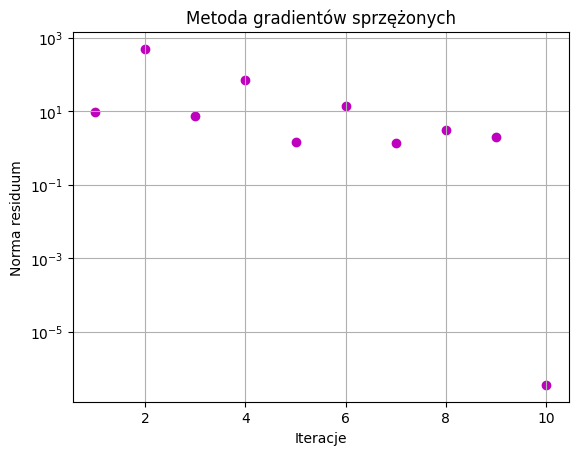

In [40]:
# Gradienty
error = []
def callback_1(Xk):
    error.append(np.linalg.norm(b3 - A3 @ Xk))
if main.is_symmetric(A3):
    results_gradients_3, info = sp.sparse.linalg.cg(A3, b3, maxiter = 15, callback = callback_1, atol = 2.2e-16)
    m = len(error)
    x_r = np.arange(1,m + 1, 1)
    plt.scatter(x_r, error, color = 'm')
    plt.title("Metoda gradientów sprzężonych")
    plt.yscale('log')
    plt.xlabel("Iteracje")
    plt.ylabel("Norma residuum")
    plt.grid()
    plt.show()

372 µs ± 72.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
353 µs ± 68.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
293 µs ± 53 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
312 µs ± 60 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
285 µs ± 56.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
285 µs ± 29.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
295 µs ± 27.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
279 µs ± 7.83 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
278 µs ± 37.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
358 µs ± 55.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
263 µs ± 8.92 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
288 µs ± 46.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
283 µs ± 35.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
279 µs ± 42.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


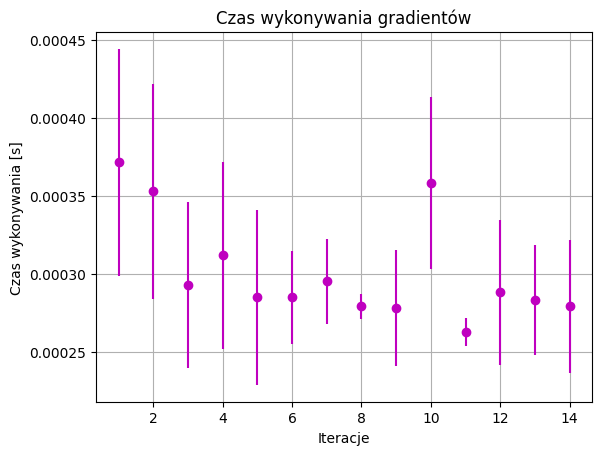

In [41]:
time = []
error = []
size = 15
for i in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A3, b3, maxiter = i, atol = 2.2e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [i for i in range(1, size)]
plt.errorbar(x, time, yerr = error, linestyle = "None", marker = "o", color = 'm')
plt.title("Czas wykonywania gradientów")
plt.xlabel("Iteracje")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()

0


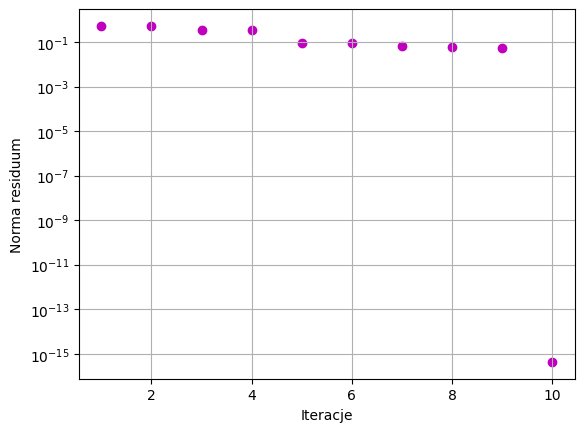

In [42]:
# GRMES
error = []
def callback_1(Xk):
    error.append(Xk)

results_GMRES_3, info = sp.sparse.linalg.gmres(A3, b3, maxiter=10, callback=callback_1, atol=2.2e-16, callback_type='pr_norm')

print(info)
lght = len(error)
x_r = [i + 1 for i in range(lght)]
plt.scatter(x_r, error, color = 'm')
plt.yscale('log')
plt.xlabel("Iteracje")
plt.ylabel("Norma residuum")
plt.grid()
plt.show()

363 µs ± 41.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
329 µs ± 64.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
326 µs ± 86.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
381 µs ± 47.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
304 µs ± 51.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
299 µs ± 32.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
300 µs ± 26.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
272 µs ± 24.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
270 µs ± 22.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
300 µs ± 54 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
311 µs ± 56 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
300 µs ± 51 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
312 µs ± 69.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
318 µs ± 46.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


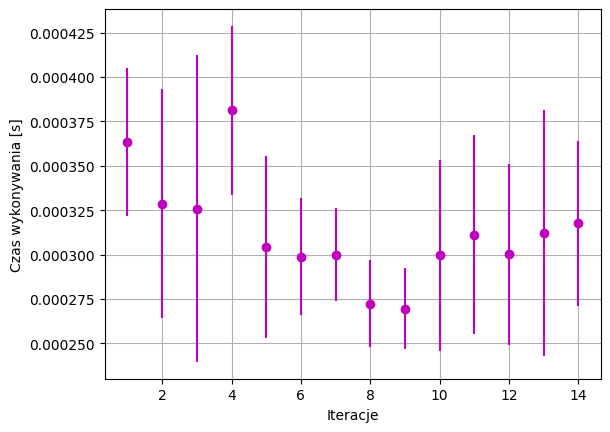

In [43]:
time = []
error = []
size = 15
for i in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A3, b3, maxiter = i, atol = 2.2e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [i for i in range(1, size)]
plt.errorbar(x, time, yerr = error, linestyle = "None", marker = "o", color = 'm')
plt.xlabel("Iteracje")
plt.ylabel("Czas wykonywania [s]")
plt.grid()
plt.show()

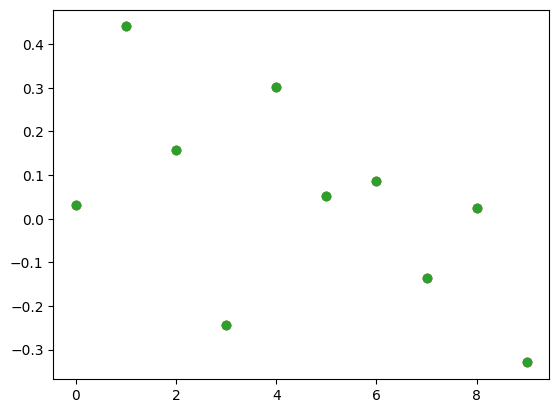

In [46]:
plt.scatter(range(m), results_solve_3)
#plt.scatter(range(m), results_jacobi_3)
plt.scatter(range(m), results_gradients_3)
plt.scatter(range(m), results_GMRES_3)

In [ ]:
# Nie widać zadnej rozbieznosci rozwiazan na wykresie.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)